In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.metrics as metrics
import math
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 500)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.shape , test.shape

((8693, 14), (4277, 13))

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# Data Description from Kaggle

<img src="spaceship-titanic-Data Description.PNG"/>


In [7]:
train["Transported"].describe()

count     8693
unique       2
top       True
freq      4378
Name: Transported, dtype: object

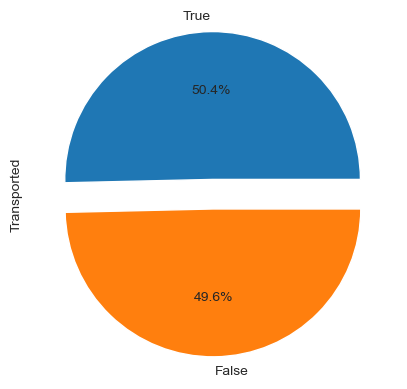

In [8]:
train["Transported"].value_counts(sort=True).plot.pie(explode=[.1,.1], autopct='%.1f%%')
plt.show()

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

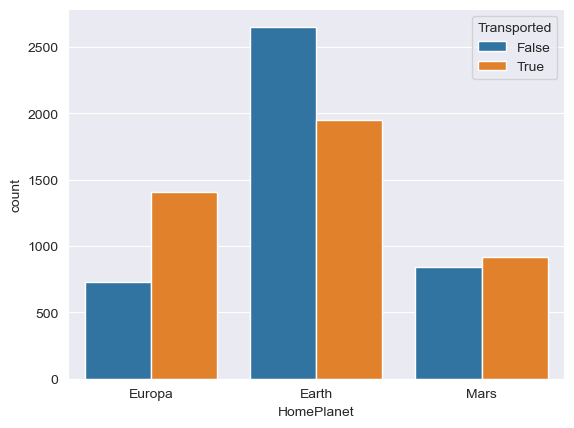

In [9]:
# Looking at the categorical features
sns.countplot(data=train,x="HomePlanet", hue="Transported")

We can see that most of the passengers came from earth and they have smaller chance of being transported than other. Europa has the most percentage of transported among others

<AxesSubplot:xlabel='Destination', ylabel='count'>

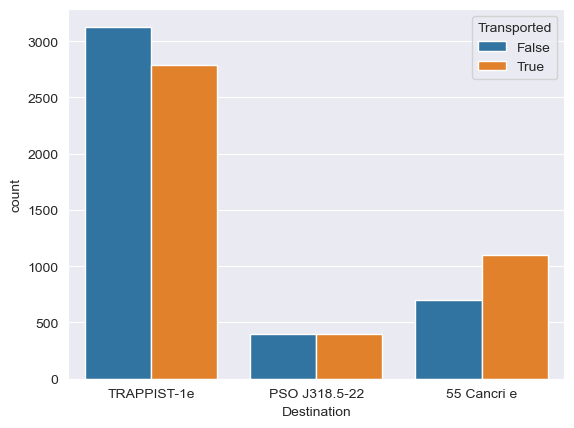

In [10]:
sns.countplot(data=train,x="Destination", hue="Transported")

<AxesSubplot:xlabel='VIP', ylabel='count'>

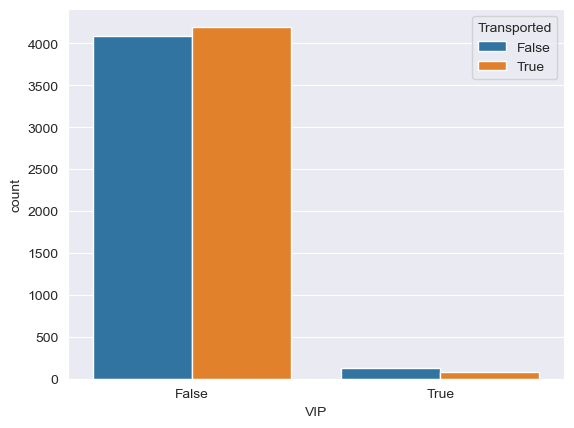

In [11]:
sns.countplot(data=train, x="VIP", hue="Transported")

Almost all of the passengers were not VIP and there seems to be no difference when it comes to who were able to be transported. This shows that the feature is not gonna be so important in our model and we can consider dropping it.

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

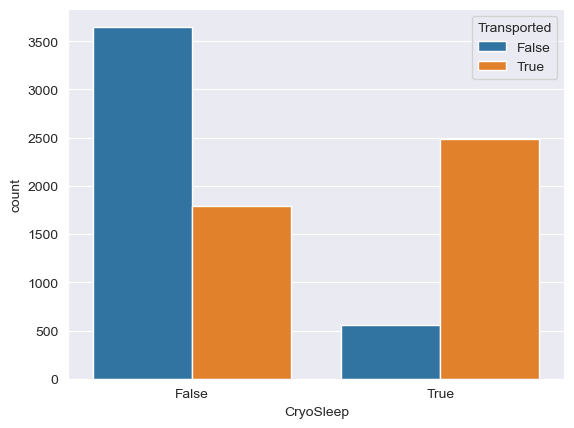

In [12]:
sns.countplot(data=train, x="CryoSleep", hue="Transported")

The graph shows that most of the passengers were not in cryoSleep and the ones that are in cryoSleep has a significantly higher chance of being transported than others. This shows that CryoSleep is a feature that we want to use in our model

<AxesSubplot:xlabel='Cabin_Deck', ylabel='count'>

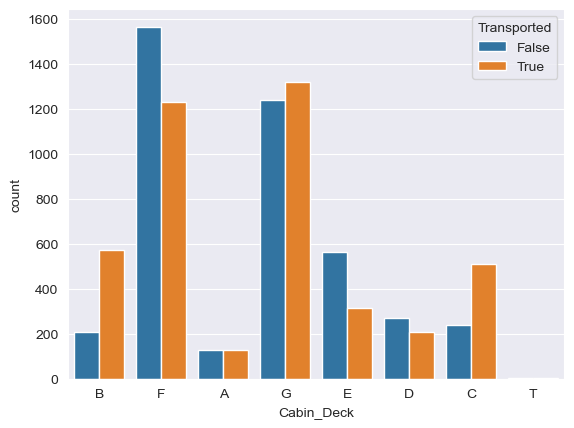

In [13]:
Cabin_Data = {
    'Cabin_Deck' : list(train["Cabin"].str.split('/', expand =True)[0].copy()),
    'Cabin_Side' : list(train["Cabin"].str.split('/', expand=True)[2].copy()),
    'Transported' : list(train["Transported"].copy())
}
Cabin_Data = pd.DataFrame(Cabin_Data)

Cabin_Data_test = {
    'Cabin_Deck' : list(test["Cabin"].str.split('/', expand =True)[0].copy()),
    'Cabin_Side' : list(test["Cabin"].str.split('/', expand=True)[2].copy()),
}
Cabin_Data_test = pd.DataFrame(Cabin_Data_test)

sns.countplot(data=Cabin_Data, x="Cabin_Deck", hue="Transported")


In [14]:
Cabin_Data["Cabin_Deck"].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_Deck, dtype: int64

<AxesSubplot:xlabel='Cabin_Deck', ylabel='Transported'>

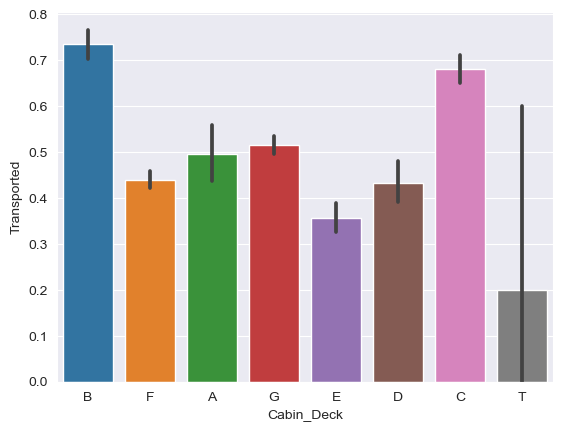

In [15]:
sns.barplot(data=Cabin_Data,x='Cabin_Deck', y="Transported")

<AxesSubplot:xlabel='Cabin_Side', ylabel='count'>

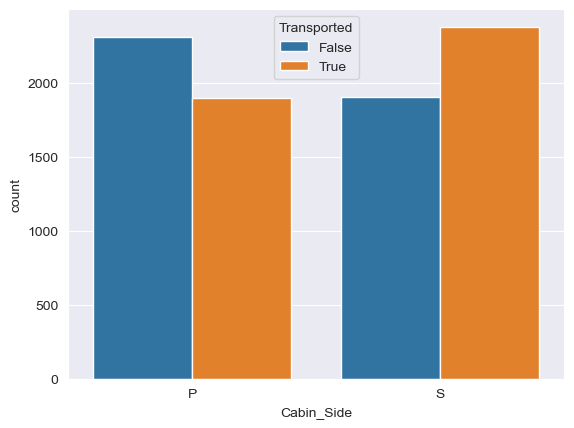

In [16]:
sns.countplot(data=Cabin_Data, x="Cabin_Side", hue="Transported")

<AxesSubplot:xlabel='Cabin_Side', ylabel='Transported'>

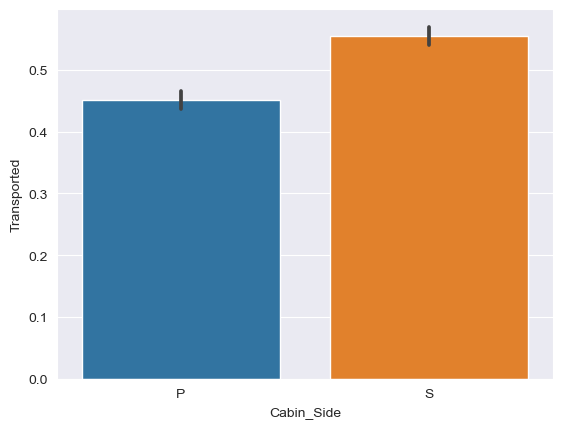

In [17]:
sns.barplot(data=Cabin_Data,x='Cabin_Side', y="Transported")

In [18]:
y = (train["Transported"] == True).astype(int)
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int32

In [19]:
#Selecting the numeric and object columns
categorical_cols = train.select_dtypes(include=["object"]).columns
numerical_cols = train.select_dtypes(include=[np.number]).columns
print(numerical_cols)
print(categorical_cols)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')


In [20]:
for col in categorical_cols:
    print(train[col].value_counts())

0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
False    5439
True     3037
Name: CryoSleep, dtype: int64
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64
False    8291
True      199
Name: VIP, dtype: int64
Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64


In [21]:
for col in numerical_cols:
    print(train[col].describe())

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64
count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64
count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64
count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      23492.000000
Name: ShoppingMall, dtype: float64
count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
N

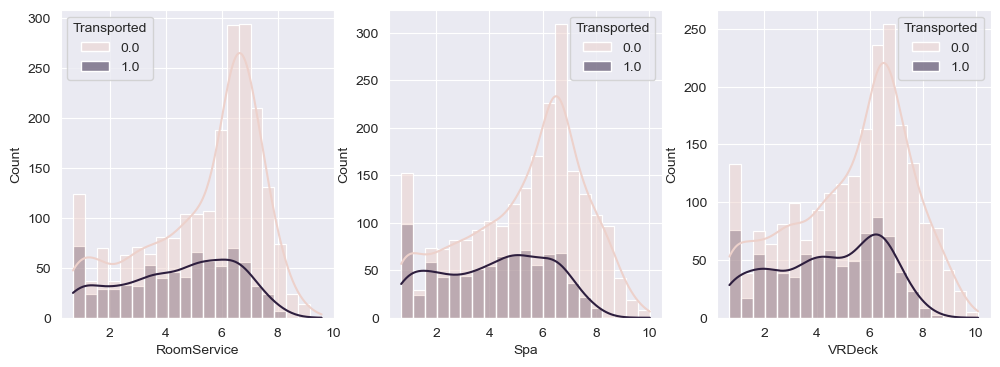

In [22]:
fig, axis = plt.subplots(1,3, figsize=(12,4))
sns.histplot(data=train[train["RoomService"] != 0], x=np.log(1 + train["RoomService"]), hue="Transported", kde=True, ax=axis[0])
sns.histplot(data=train[train["Spa"] != 0], x=np.log(1 + train["Spa"]), hue="Transported", kde=True,  ax=axis[1])
sns.histplot(data=train[train["VRDeck"] != 0], x=np.log(1 + train["VRDeck"]), hue="Transported", kde=True, ax=axis[2]);

<AxesSubplot:xlabel='VRDeck', ylabel='count'>

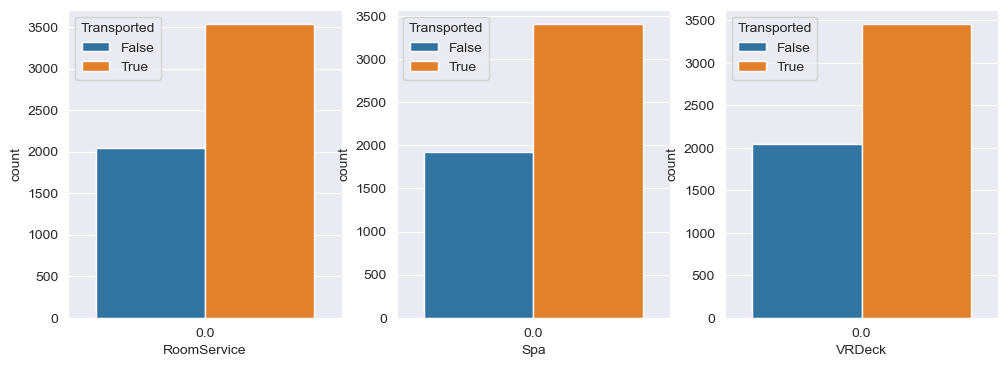

In [23]:
fig, axis = plt.subplots(1,3, figsize=(12,4))
sns.countplot(data=train[train["RoomService"] == 0], x="RoomService", hue="Transported", ax=axis[0])
sns.countplot(data=train[train["Spa"] == 0], x="Spa", hue="Transported",  ax=axis[1])
sns.countplot(data=train[train["VRDeck"] == 0], x="VRDeck", hue="Transported", ax=axis[2])

<AxesSubplot:xlabel='ShoppingMall', ylabel='Count'>

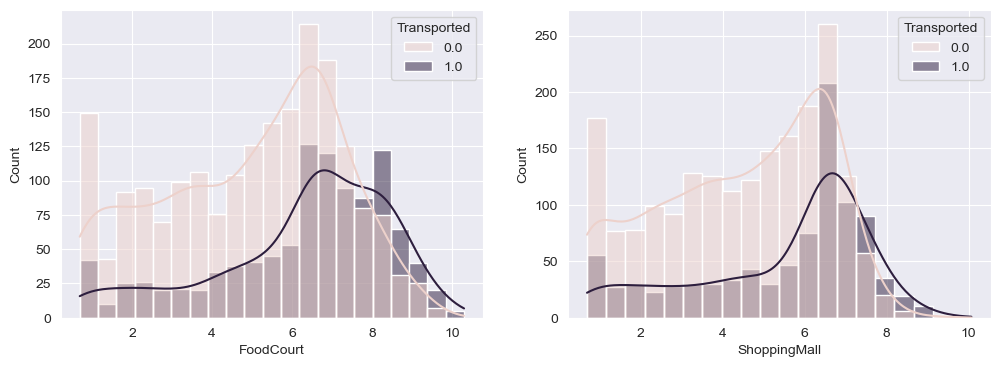

In [24]:
ig, axis = plt.subplots(1,2, figsize=(12,4))
sns.histplot(data=train[train["FoodCourt"] != 0], x=np.log(1 + train["FoodCourt"]), hue="Transported", kde=True, ax=axis[0])
sns.histplot(data=train[train["ShoppingMall"] != 0], x=np.log(1 + train["ShoppingMall"]), hue="Transported", kde=True,  ax=axis[1])

<AxesSubplot:xlabel='ShoppingMall', ylabel='count'>

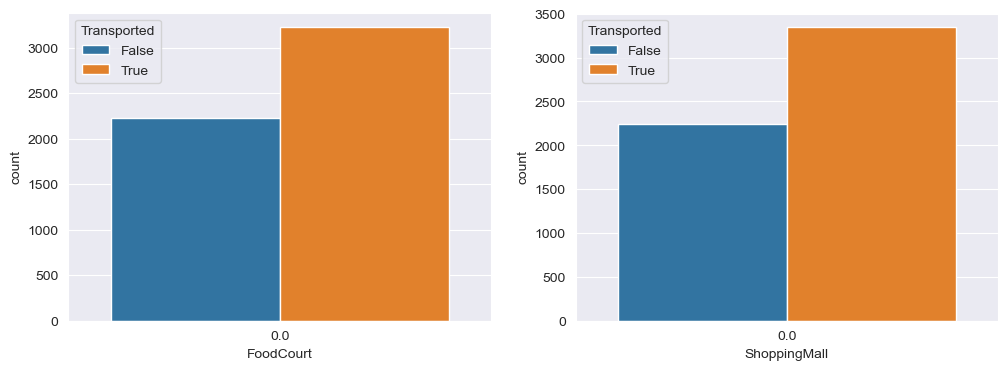

In [25]:
fig, axis = plt.subplots(1,2, figsize=(12,4))
sns.countplot(data=train[train["FoodCourt"] == 0], x="FoodCourt", hue="Transported", ax=axis[0])
sns.countplot(data=train[train["ShoppingMall"] == 0], x="ShoppingMall", hue="Transported",  ax=axis[1])

It can be seen that the spendings have a high correlation between them and it is reasonable that we concat all the 3 spending features into a single feature and then categorize them regarding to their value such that if it is bigger than 0, we can give 1 otherwise we can give 0.

<AxesSubplot:xlabel='Age', ylabel='Count'>

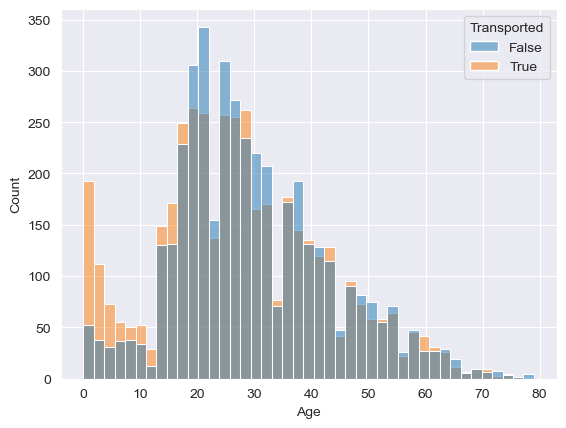

In [26]:
sns.histplot(data=train, x="Age", hue="Transported")

The above histogram shows that the passenger who are under 20 years old has a higher chance to be transported than the others.

We have finished our Explanatory Data Analysis Part, now we can continue for Data preprocessing.

In [27]:
# check the null variables
nan_columns = train.columns[train.isna().any()]
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Handling the missing values

RoomService, FoodCourt, ShoppingMall, VrDeck and Spa:  these features are float variables and it can be seen from the describe function, more than %50 did not spent money at all, so we can replace the null values with median

Cyrosleep : is a booleans variable and the mode is False so I can fill the missing values with False. Also I need to fix dtypes since this is boolean not int64

VIP : is also a booleans variable and the mode is False with more than %99, so I can fill the missing values with False

And we can choose the most common values for homeplanet and the destination columns since there is a similar trend with the above features, so for the homeplanet I will use Earth and for the destination I will use Trappist-1e

Age: since it is continuous I can choose the mean value for the null values

And for the Cabin I will seperate the feature to cabin_deck and cabin_side since I believe the locationwise deck and side are the features that are important since they define a region in the ship eventhough the number also could be effecting our result I prefer not to take this into account.

In [28]:
train["RoomService"] = train["RoomService"].fillna(train["RoomService"].median())
train["FoodCourt"].fillna(train["FoodCourt"].median(), inplace=True)
train["ShoppingMall"].fillna(train["ShoppingMall"].median(), inplace=True)
train["Spa"].fillna(train["Spa"].median(), inplace=True)
train["VRDeck"].fillna(train["VRDeck"].median(), inplace=True)

test["RoomService"].fillna(test["RoomService"].median(), inplace=True)
test["FoodCourt"].fillna(test["FoodCourt"].median(), inplace=True)
test["ShoppingMall"].fillna(test["ShoppingMall"].median(), inplace=True)
test["Spa"].fillna(test["Spa"].median(), inplace=True)
test["VRDeck"].fillna(test["VRDeck"].median(), inplace=True)

In [29]:
train["Total_Expend"] = 0
test["Total_Expend"] = 0

for i in range(train.__len__()):
    train.loc[i,"Total_Expend"] = train.loc[i,"RoomService"] + train.loc[i,"Spa"] + train.loc[i,"VRDeck"] + train.loc[i,"FoodCourt"] + train.loc[i,"ShoppingMall"]

for i in range(test.__len__()):
    test.loc[i,"Total_Expend"] = test.loc[i,"RoomService"] + test.loc[i,"Spa"] + test.loc[i,"VRDeck"] + test.loc[i,"FoodCourt"] + test.loc[i,"ShoppingMall"]



In [30]:
# let's make total expends to a boolean variable
for i in range(train.__len__()):
    if train.loc[i,"Total_Expend"] != 0 :
        train.loc[i,"Total_Expend"] = 1

# let's make total expends to a boolean variable
for i in range(test.__len__()):
    if test.loc[i,"Total_Expend"] != 0 :
        test.loc[i,"Total_Expend"] = 1



In [31]:
train = pd.concat([train,Cabin_Data["Cabin_Deck"],Cabin_Data["Cabin_Side"]], axis=1)

In [32]:
test = pd.concat([test,Cabin_Data_test["Cabin_Deck"],Cabin_Data_test["Cabin_Side"]], axis=1)

In [33]:
train = train.drop(columns=["RoomService","Spa","VRDeck","FoodCourt","ShoppingMall", "PassengerId","VIP","Cabin","Name"])

In [34]:
test =test.drop(columns=["RoomService","Spa","VRDeck","FoodCourt","ShoppingMall", "PassengerId","VIP","Cabin"])

In [35]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,Transported,Total_Expend,Cabin_Deck,Cabin_Side
0,Europa,False,TRAPPIST-1e,39.0,False,0,B,P
1,Earth,False,TRAPPIST-1e,24.0,True,1,F,S
2,Europa,False,TRAPPIST-1e,58.0,False,1,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,1,A,S
4,Earth,False,TRAPPIST-1e,16.0,True,1,F,S


In [36]:
train["Age"].fillna(train["Age"].mean(),inplace=True)
test["Age"].fillna(test["Age"].mean(),inplace=True)

In [37]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age               0
Transported       0
Total_Expend      0
Cabin_Deck      199
Cabin_Side      199
dtype: int64

In [38]:
train["Cabin_Deck"].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_Deck, dtype: int64

In [39]:
train["Cabin_Side"].value_counts()

S    4288
P    4206
Name: Cabin_Side, dtype: int64

In [40]:
train["HomePlanet"].fillna("Earth", inplace=True)
test["HomePlanet"].fillna("Earth", inplace=True)

train["Destination"].fillna("TRAPPIST-1e", inplace=True)
test["Destination"].fillna("TRAPPIST-1e", inplace=True)

train["CryoSleep"].fillna(False, inplace=True)
test["CryoSleep"].fillna(False, inplace=True)

train["Cabin_Deck"].fillna("F", inplace=True)
test["Cabin_Deck"].fillna("F", inplace=True)

train["Cabin_Side"].fillna("S", inplace=True)
test["Cabin_Side"].fillna("S", inplace=True)

In [41]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
Transported     0
Total_Expend    0
Cabin_Deck      0
Cabin_Side      0
dtype: int64

In [42]:
test_encoded = pd.get_dummies(test,columns=["HomePlanet","Destination","Cabin_Deck","Cabin_Side"])

In [43]:
train_encoded = pd.get_dummies(train,columns=["HomePlanet","Destination","Cabin_Deck","Cabin_Side"])
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   bool   
 1   Age                        8693 non-null   float64
 2   Transported                8693 non-null   bool   
 3   Total_Expend               8693 non-null   int64  
 4   HomePlanet_Earth           8693 non-null   uint8  
 5   HomePlanet_Europa          8693 non-null   uint8  
 6   HomePlanet_Mars            8693 non-null   uint8  
 7   Destination_55 Cancri e    8693 non-null   uint8  
 8   Destination_PSO J318.5-22  8693 non-null   uint8  
 9   Destination_TRAPPIST-1e    8693 non-null   uint8  
 10  Cabin_Deck_A               8693 non-null   uint8  
 11  Cabin_Deck_B               8693 non-null   uint8  
 12  Cabin_Deck_C               8693 non-null   uint8  
 13  Cabin_Deck_D               8693 non-null   uint8

In [44]:
train_encoded["Transported"] = train_encoded["Transported"].astype(int)
train_encoded["CryoSleep"] = train_encoded["CryoSleep"].astype(int)
test_encoded["Transported"] = train_encoded["Transported"].astype(int)
test_encoded["CryoSleep"] = train_encoded["CryoSleep"].astype(int)


In [45]:
test_encoded = test_encoded.drop(columns=["Name", "Transported"])

In [46]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int32  
 1   Age                        8693 non-null   float64
 2   Transported                8693 non-null   int32  
 3   Total_Expend               8693 non-null   int64  
 4   HomePlanet_Earth           8693 non-null   uint8  
 5   HomePlanet_Europa          8693 non-null   uint8  
 6   HomePlanet_Mars            8693 non-null   uint8  
 7   Destination_55 Cancri e    8693 non-null   uint8  
 8   Destination_PSO J318.5-22  8693 non-null   uint8  
 9   Destination_TRAPPIST-1e    8693 non-null   uint8  
 10  Cabin_Deck_A               8693 non-null   uint8  
 11  Cabin_Deck_B               8693 non-null   uint8  
 12  Cabin_Deck_C               8693 non-null   uint8  
 13  Cabin_Deck_D               8693 non-null   uint8

In [47]:
train_encoded.head()

,CryoSleep,Age,Transported,Total_Expend,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_P,Cabin_Side_S
0,0,39.0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,0,24.0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,0,58.0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
3,0,33.0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
4,0,16.0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


Now Our data is ready to be used in the models.
But before going in full detail let's have a look at the correlation_matrix

In [48]:
correlation_matrix = train_encoded.corrwith(y)
correlations = pd.concat([train_encoded, y], axis=1).corr()
print(correlation_matrix)

CryoSleep                    0.460132
Age                         -0.074249
Transported                  1.000000
Total_Expend                -0.481628
HomePlanet_Earth            -0.168845
HomePlanet_Europa            0.176916
HomePlanet_Mars              0.019544
Destination_55 Cancri e      0.108722
Destination_PSO J318.5-22    0.000092
Destination_TRAPPIST-1e     -0.096319
Cabin_Deck_A                -0.002623
Cabin_Deck_B                 0.144733
Cabin_Deck_C                 0.108193
Cabin_Deck_D                -0.034046
Cabin_Deck_E                -0.097965
Cabin_Deck_F                -0.086360
Cabin_Deck_G                 0.016269
Cabin_Deck_T                -0.014568
Cabin_Side_P                -0.101397
Cabin_Side_S                 0.101397
dtype: float64


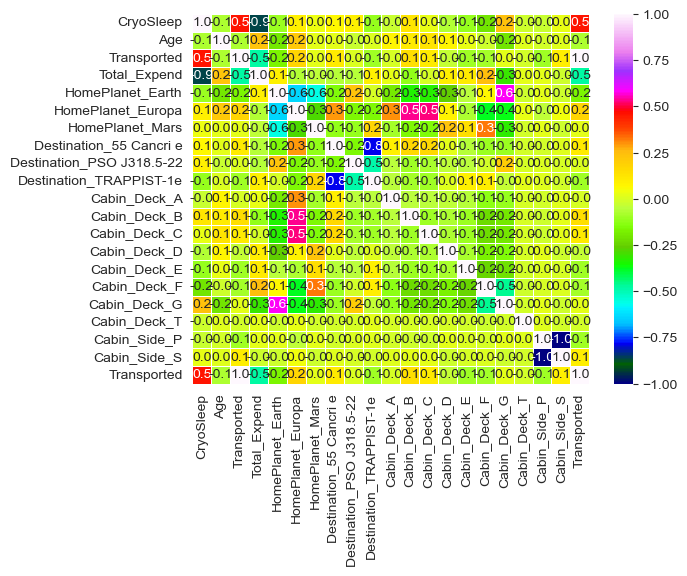

In [49]:
sns.heatmap(correlations,annot=True, fmt=".1f",linewidths=.5,cmap="gist_ncar");

Since I have already done the feature selection while imputations and encodings, we are gonna go for the model selections

[(-1.0, 1.0), Text(0, 0.5, 'Transported Correlations')]

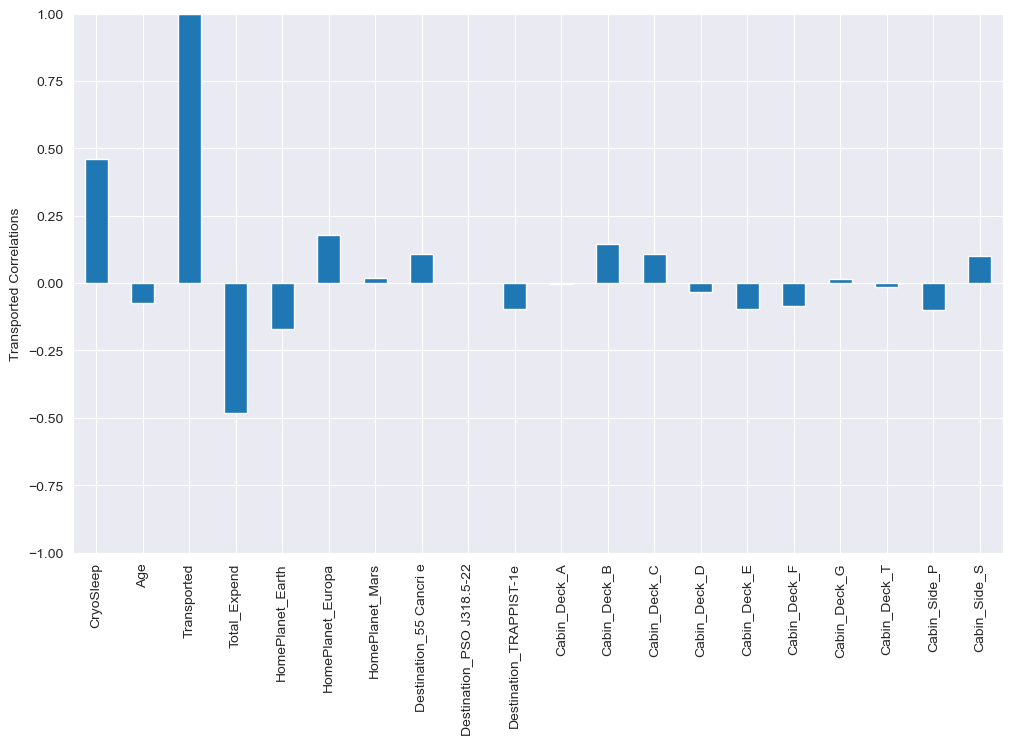

In [50]:


plt.figure(figsize=(12,7))
ax = correlation_matrix.plot(kind="bar")
ax.set(ylim=[-1,1],ylabel="Transported Correlations")

In [51]:
y = train_encoded["Transported"]
train_encoded = train_encoded.drop(columns=["Transported"])

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_encoded)
train_encoded = pd.DataFrame(scaler.transform(train_encoded),columns=train_encoded.columns)
train_encoded.head()

,CryoSleep,Age,Total_Expend,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_P,Cabin_Side_S
0,0.0,0.493671,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.303797,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.734177,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.417722,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.202532,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [54]:
train_encoded.head()

,CryoSleep,Age,Total_Expend,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Deck_A,Cabin_Deck_B,Cabin_Deck_C,Cabin_Deck_D,Cabin_Deck_E,Cabin_Deck_F,Cabin_Deck_G,Cabin_Deck_T,Cabin_Side_P,Cabin_Side_S
0,0.0,0.493671,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.303797,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.734177,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.417722,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.202532,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_encoded,y,test_size=0.3,random_state=42)

In [56]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(n_jobs=-1,random_state=17)

logistic_regression.fit(X_train,y_train)


LogisticRegression(n_jobs=-1, random_state=17)

In [57]:
y_pred_logistic = logistic_regression.predict(X_test)

In [58]:
Cross_val_score_logistic = cross_val_score(logistic_regression, X_test, y_test, cv=5).mean()
accuracy_score_logistic = accuracy_score(y_test,y_pred_logistic)
f1_score_logistic = f1_score(y_test,y_pred_logistic,average="binary")

In [59]:
print("Cross Validation Score : ", Cross_val_score_logistic , "\n","Accuracy : ", accuracy_score_logistic, "\n", "F1 Score : ", f1_score_logistic)

Cross Validation Score :  0.7285231024922598 
 Accuracy :  0.7315950920245399 
 F1 Score :  0.7224425059476606


In [60]:
from sklearn.svm import LinearSVC
Linear_SVC = LinearSVC()
Linear_SVC.fit(X_train,y_train)

LinearSVC()

In [61]:
y_pred_SVC = Linear_SVC.predict(X_test)
Cross_val_score_SVC = cross_val_score(Linear_SVC, X_test, y_test, cv=5).mean()
accuracy_score_SVC = accuracy_score(y_test,y_pred_SVC)
f1_score_SVC = f1_score(y_test,y_pred_SVC,average="binary")
print("Cross Validation Score : ", Cross_val_score_SVC , "\n","Accuracy : ", accuracy_score_SVC, "\n", "F1 Score : ", f1_score_SVC)

Cross Validation Score :  0.7388848442061758 
 Accuracy :  0.736579754601227 
 F1 Score :  0.727705112960761


In [62]:
from sklearn.svm import SVC
RBF_SVC = SVC(kernel="rbf",gamma=1.0,C=10.0)
RBF_SVC.fit(X_train,y_train)

SVC(C=10.0, gamma=1.0)

In [63]:
y_pred_RBF_SVC = RBF_SVC.predict(X_test)
Cross_val_score_RBF_SVC = cross_val_score(RBF_SVC, X_test, y_test, cv=5).mean()
accuracy_score_RBF_SVC = accuracy_score(y_test,y_pred_RBF_SVC)
f1_score_RBF_SVC = f1_score(y_test,y_pred_RBF_SVC,average="binary")
print("Cross Validation Score : ", Cross_val_score_RBF_SVC , "\n","Accuracy : ", accuracy_score_RBF_SVC, "\n", "F1 Score : ", f1_score_RBF_SVC)

Cross Validation Score :  0.72967399857333 
 Accuracy :  0.7369631901840491 
 F1 Score :  0.7247191011235955


In [64]:
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier(random_state=17)
Tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=17)

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
# Create a parameter dictionary for the tree depth
# In what range to sort through? Based on common sense, it should be taken in a range from 1 to 10

l = np.arange(1,15)
tree_params = {'max_depth': l, 'max_features': [0.5,0.7,1.0]}
#max_features -maximum number of feature combinations for which split is done
# This speeds up the training and adds some randomness to your classifier (it can also help against retraining)
tree_params

{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 'max_features': [0.5, 0.7, 1.0]}

In [67]:
Tree_grid = GridSearchCV(Tree,tree_params, cv=5, n_jobs=-1,verbose=True)

In [68]:
Tree_grid.fit(X_train,y_train)
Tree_grid.best_score_

Fitting 5 folds for each of 42 candidates, totalling 210 fits


0.7483976992604766

In [69]:
Tree_grid.score(X_test,y_test)

0.7377300613496932

In [70]:
y_pred_Tree = Tree_grid.predict(X_test)
Cross_val_score_Tree = cross_val_score(Tree_grid, X_test, y_test, cv=5).mean()
accuracy_score_Tree = accuracy_score(y_test,y_pred_Tree)
f1_score_Tree = f1_score(y_test,y_pred_Tree,average="binary")
print("Cross Validation Score : ", Cross_val_score_Tree , "\n","Accuracy : ", accuracy_score_Tree, "\n", "F1 Score : ", f1_score_Tree)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Cross Validation Score :  0.7381112067127025 
 Accuracy :  0.7377300613496932 
 F1 Score :  0.7147623019182652


In [71]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=100, max_features=20, random_state=17)

In [72]:
RFC = RFC.fit(X_train,y_train)
RFC

RandomForestClassifier(max_features=20, random_state=17)

In [73]:
y_pred_RFC = RFC.predict(X_test)
Cross_val_score_RFC = cross_val_score(RFC, X_test, y_test, cv=5).mean()
accuracy_score_RFC = accuracy_score(y_test,y_pred_RFC)
f1_score_RFC = f1_score(y_test,y_pred_RFC,average="binary")
print("Cross Validation Score : ", Cross_val_score_RFC ,"\nAccuracy : ", accuracy_score_RFC, "\nF1 Score : ", f1_score_RFC)

Cross Validation Score :  0.6909472646913907 
Accuracy :  0.7028374233128835 
F1 Score :  0.6913580246913581


In [74]:
test = pd.read_csv("test.csv")

In [75]:
y_predicted = pd.DataFrame(Linear_SVC.predict(test_encoded)).astype(bool)

In [76]:
submit = pd.concat([test["PassengerId"],y_predicted], axis=1)

In [77]:
submit

,PassengerId,0
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [78]:
submit.to_csv("submit_2187317.csv",index=False)

In [79]:
y_predicted = pd.DataFrame(Tree_grid.predict(test_encoded)).astype(bool)
submit = pd.concat([test["PassengerId"],y_predicted], axis=1)
submit.to_csv("submit_2187317.csv",index=False)

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.736
Accuracy score (validation): 0.740
Learning rate:  0.075
Accuracy score (training): 0.736
Accuracy score (validation): 0.740
Learning rate:  0.1
Accuracy score (training): 0.736
Accuracy score (validation): 0.740
Learning rate:  0.25
Accuracy score (training): 0.736
Accuracy score (validation): 0.740
Learning rate:  0.5
Accuracy score (training): 0.750
Accuracy score (validation): 0.740
Learning rate:  0.75
Accuracy score (training): 0.743
Accuracy score (validation): 0.741
Learning rate:  1
Accuracy score (training): 0.744
Accuracy score (validation): 0.737


In [81]:
gb_clf_0_5 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)

gb_clf_0_5.fit(X_train, y_train)
gb_predict = gb_clf_0_5.predict(X_test)

In [82]:
Cross_val_score_GB = cross_val_score(gb_clf_0_5, X_test, y_test, cv=5).mean()
accuracy_score_GB = accuracy_score(y_test,gb_predict)
f1_score_GB = f1_score(y_test,gb_predict,average="binary")
print("Cross Validation Score : ", Cross_val_score_GB ,"\nAccuracy : ", accuracy_score_GB, "\nF1 Score : ", f1_score_GB)

Cross Validation Score :  0.736579375059751 
Accuracy :  0.7400306748466258 
F1 Score :  0.7239413680781761


In [83]:
y_predicted = pd.DataFrame(gb_clf_0_5.predict(test_encoded)).astype(bool)
submit = pd.concat([test["PassengerId"],y_predicted], axis=1)
submit.to_csv("submit_2187317.csv",index=False)